## Example 5: Extractive Distillation

#### What happens when an azeotrope occurs in a desired distillation, and 2 species cannot be purified beyond that point?  One commonly used industrial technique is called Extractive Distillation, where third species called an Entrainer is added to the column in its own separate feed stage.  The column is now broken down into 3 sections: the Rectifying Section, the Stripping Section, and a new "Middle Section" which exists between the Entrainer and Feed Stages.

#### This middle section will be explored in these demonstrations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from thermo_models.RaoultsLawModel import *
from distillation.DistillationModel import DistillationModel
import utils.AntoineEquation as AE
from IPython.display import clear_output
from tqdm import tqdm
from distillation.DistillationDoubleFeed import *
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive, Button, VBox, HBox, Output
from IPython.display import clear_output
from thermo_models.VanLaarModel import *
from distillation.residue_curves import *

In [2]:
#Acetone (1 - Light) Methanol (2 - Intermediate) Water (3 - Heavy)
#Table A.6 in Knapp 
A_ij = {
    (1,1):0,
    (1,2):182.0,
    (1,3):795.0,
    (2,1):196,
    (2,2):0,
    (2,3):332.6,
    (3,1):490.0,
    (3,2):163.80,
    (3,3):0
}

#Different definition of Antoine where we have to take the negative of B
Acet_A = 21.3099; Acet_B = 2801.53; Acet_C = -42.875
Meth_A = 23.4832; Meth_B = 3634.01; Meth_C = -33.768
#Assuming P < 2 atm
Water_A = 23.2256; Water_B = 3835.18; Water_C = -45.343

#Knapp Thesis Figure 3.8 uses ln form of Antoine
AcetoneAntoine = AE.AntoineEquationBaseE(Acet_A,Acet_B,Acet_C)
MethanolAntoine = AE.AntoineEquationBaseE(Meth_A, Meth_B, Meth_C)
WaterAntoine = AE.AntoineEquationBaseE(Water_A,Water_B,Water_C)
        
P_sys = 101325
# Create a Raoult's law object
AceMethWaterSys = VanLaarModel(num_comp = 3, P_sys = P_sys, A_coeff = A_ij, comp_names = ["Acetone","Methanol","Water"], partial_pressure_eqs = [AcetoneAntoine, MethanolAntoine, WaterAntoine])


In [3]:
#Ethanol (1 - Light) Water (2 - Intermediate) Ethylene Glycol (3 - Heavy)
#Table A.5 in Knapp, assuming P < 2 atm
A_ij_EWEG = {
    (1,1):0,
    (1,2):615.9,
    (1,3):277.3,
    (2,1):314,
    (2,2):0,
    (2,3):376.028,
    (3,1):892.7,
    (3,2):622.539,
    (3,3):0
}

#Different definition of Antoine where we have to take the negative of B
#Table A.4 in Knapp
#Assuming P < 2 atm
Eth_A = 23.5807; Eth_B = 3673.81; Eth_C = -46.681
Water_A = 23.2256; Water_B = 3835.18; Water_C = -45.343
EG_A = 25.1431; EG_B = 6022.18; EG_C = -28.25


#Knapp Thesis Figure 3.8 uses ln form of Antoine
EthanolAntoine = AE.AntoineEquationBaseE(Eth_A, Eth_B, Eth_C)
WaterAntoine = AE.AntoineEquationBaseE(Water_A, Water_B, Water_C)
EthyleneGlycolAntoine = AE.AntoineEquationBaseE(EG_A, EG_B, EG_C)
        
P_sys = 101325
# Create a Raoult's law object
EthWaterEGSys = VanLaarModel(num_comp = 3, P_sys = P_sys, A_coeff = A_ij_EWEG, comp_names = ["Ethanol","Water","Ethylene Glycol"], partial_pressure_eqs = [EthanolAntoine, WaterAntoine, EthyleneGlycolAntoine])



### Demo 1
Residue Curves

Integration stopped due to overflow, NaN values, or out-of-bound values.
Integration stopped due to overflow, NaN values, or out-of-bound values.
Integration stopped due to overflow, NaN values, or out-of-bound values.


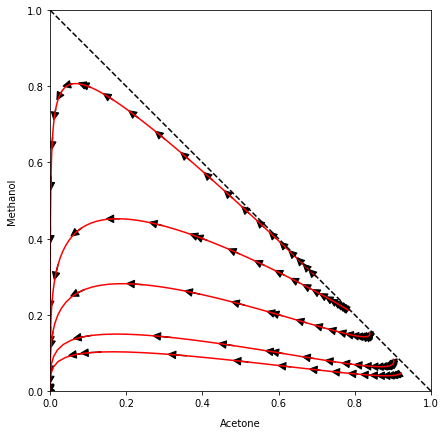

In [4]:
out_residue = Output()
rcm = phase_portraits(thermo_model=AceMethWaterSys)
fig, ax = plt.subplots(1,1,figsize= (7,7))
rcm.plot_residue_curve(ax, [0,7],data_points = 100, 
                            init_comps = [ 
                                            np.array([0.4,0.4,0.2]),
                                            np.array([0.6,0.2,0.2]),
                                            np.array([0.6,0.1,0.3]),
                                            np.array([0.1,0.8,0.1]),
                                            np.array([0.1,0.1,0.8])
                                            ])
plt.show()

In [5]:
## RESIDUE CURVE FOR ETHANOL-WATER-ETHYLENE GLYCOL, HAS SOME OVERFLOW ##

# out_residue = Output()
# rcm = phase_portraits(thermo_model=AceMethWaterSys)
# fig, ax = plt.subplots(1,1,figsize= (7,7))
# rcm.plot_residue_curve(ax, [0,7],data_points = 100, 
                            # init_comps = [ 
                                            # np.array([0.4,0.4,0.2]),
                                            # np.array([0.6,0.2,0.2]),
                                            # np.array([0.6,0.1,0.3]),
                                            # np.array([0.1,0.8,0.1]),
                                            # np.array([0.1,0.1,0.8])
                                            # ])
# plt.show()

### Demo 1.5: Comparing two Systems

Two systems are depicted in the graphs below.  Differences in the locations of the fixed points lead to different properties in the shapes of the operating curves.  These differences are highlighted at 3 sets of identical parameters:

A:  Notice how the middle section on the Acetone-Methanol-Water does not move in a direction that could connect the rectifying and stripping sections.  Instead, it curves upwards towards the saddle node, while the Ethanol-Water-Ethylene Glycol system is connected by its staple, resulting in a feasible column.

B: 

C:  Focus on the shapes of the Rectifying Sections.  The Acetone-Methanol-Water system is feasible because its rectifying section curves upwards and intersects the staple.  The Ethanol-Water-Ethylene Glycol system has a rectifying section with much fewer equilibrium stages, and it moves directly towards the stable Ethylene Glycol node.  As a result, the column is unfeasible

In [6]:
# Create an interactive plot function
def interactive_plot(system):
    if system == 'A':
        middle_start = 2
        Fr = 0.5
        R = 7

    if system == 'B':
        middle_start = 6
        R = 1.5     
        Fr = 1

    if system == 'C':
        middle_start = 9
        R = 1
        Fr = 2

    xFL = np.array([0.3, 0.6, 0.1])
    xFU = np.array([0.2, 0.1, 0.7])
    zF = (Fr/(1+Fr))*xFU + (1/(1+Fr))*xFL                                #Knapp Equation 5.9
    xD = np.array([0.90, 0.08, 0.02]) 
    D_B = ((zF[0] - 0.02) / (xD[0] - zF[0]))                             #Knapp Equation 5.13, set xB[0] = 0.01
    xB = np.array([0.02, (zF[1] - D_B*(xD[1]-zF[1])), (zF[2] - D_B*(xD[2]*zF[2]))])

    distillation_modelA = DistillationModelDoubleFeed(thermo_model=AceMethWaterSys, Fr = Fr, zF = zF, xFL = xFL, xFU = xFU, xD = xD, xB = xB, reflux = R)
    distillation_modelB = DistillationModelDoubleFeed(thermo_model=EthWaterEGSys, Fr = Fr, zF = zF, xFL = xFL, xFU = xFU, xD = xD, xB = xB, reflux = R)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    distillation_modelA.plot_rect_strip_comp(axes[0], middle_start=middle_start)
    axes[0].set_title('Acetone-Methanol-Water')
    distillation_modelB.plot_rect_strip_comp(axes[1], middle_start=middle_start)
    axes[1].set_title('Ethanol-Water-Ethylene Glycol')

    plt.tight_layout()
    plt.show()


system_widget = widgets.Dropdown(
    options=["A", "B", "C"],
    description='Demo Choice:',
    disabled=False
    ) 


# Create an interactive plot with the dropdown widget
interactive(interactive_plot, system=system_widget)

interactive(children=(Dropdown(description='Demo Choice:', options=('A', 'B', 'C'), value='A'), Output()), _do…

### Demo 2 - Manipulating the Middle Section

The middle section can be thought of as a 'staple' connecting a rectifying and stripping line which otherwise would not intersect.  Select different stage numbers to introduce the Entrainer Feed and bgein the middle section to see which values result in feasible columns.  To be feasible, the middle section must intersect the rectifying line.  Also note where the endpoint of the middle section lies, and if it moves as you change the starting point.

The Reflux Ratio (R) is set to 3 and the Feed Ratio (Fr = Entrainer Rate divided by Feed Rate) is set to 0.5 for Acetone/Methanol/Water and R = 6 and Fr = 0.23 for Ethanol/Water/Ethylene Glycol.

In [7]:

# Create an interactive plot function
def interactive_plot(system, middle_start):
    thermo_choice = AceMethWaterSys
    Fr = 0.5
    R = 3
    if system == 'Ethanol/Water/Ethylene Glycol':
        thermo_choice = EthWaterEGSys
        Fr = 0.23
        R = 6
    xFL = np.array([0.3, 0.6, 0.1])
    xFU = np.array([0.2, 0.1, 0.7])
    zF = (Fr/(1+Fr))*xFU + (1/(1+Fr))*xFL                                #Knapp Equation 5.9
    xD = np.array([0.93, 0.04, 0.03]) 
    D_B = ((zF[0] - 0.02) / (xD[0] - zF[0]))                             #Knapp Equation 5.13, set xB[0] = 0.01
    xB = np.array([0.02, (zF[1] - D_B*(xD[1]-zF[1])), (zF[2] - D_B*(xD[2]*zF[2]))])

    distillation_model = DistillationModelDoubleFeed(thermo_model=thermo_choice, Fr = Fr, zF = zF, xFL = xFL, xFU = xFU, xD = xD, xB = xB, reflux = R)
    fig, ax = plt.subplots(1, 1, figsize=(5, 10))
    distillation_model.plot_rect_strip_comp(ax, middle_start=middle_start)
    plt.show()

# Create a dropdown widget for middle_start
middle_start_widget = widgets.Dropdown(
    options=[2, 4, 6, 8, 10],
    description='Middle Section Start:',
    disabled=False
)
system_widget = widgets.Dropdown(
    options=["Acetone/Methanol/Water","Ethanol/Water/Ethylene Glycol"],
    description='Components:',
    disabled=False
) 


# Create an interactive plot with the dropdown widget
interactive(interactive_plot, system=system_widget, middle_start=middle_start_widget)

interactive(children=(Dropdown(description='Components:', options=('Acetone/Methanol/Water', 'Ethanol/Water/Et…

### Demo 3 - Maximum Reflux ratio

At this point, you have seen demonstrations of distillation columns where the Reflux Ratio is too low, leading to an infeasible column.  However, with extractive distillation, a maximum reflux ratio also exists.  Move the Reflux Ratio slider and see how the system responds.  The Feed Ratio has been set to 1.0 for Acetone/Methanol/Water and 0.1 for Ethanol/Water/Ethylene Glycol.

###### Hint: For Acetone/Methanol/Water, try R values of 1.2, 8.0, and 40.0

In [8]:
R_slider =  widgets.FloatLogSlider(value=1, min=0, max=2, step=0.001,  description='Reflux Ratio:', readout_format='.1f')
go_button = widgets.Button(description='Create Model', width='15%', margin='0 10px 0 0')
system_widget = widgets.Dropdown(
    options=["Acetone/Methanol/Water","Ethanol/Water/Ethylene Glycol"],
    description='Components:',
    disabled=False
    ) 
# Create a dropdown widget for middle_start
middle_start_widget = widgets.Dropdown(
    options=[2, 4, 6, 8, 10],
    description='Middle Section Start:',
    disabled=False
)
out_middle = Output()

def plot_reflux_demo_ex5(R = R_slider, thermo_system = system_widget.value, middle_start=6):
    thermo_choice = AceMethWaterSys
    Fr = 1.0
    if thermo_system == 'Ethanol/Water/Ethylene Glycol':
        thermo_choice = EthWaterEGSys
        Fr = 0.1
    xFL = np.array([0.3, 0.6, 0.1])
    xFU = np.array([0.2, 0.1, 0.7])
    zF = (Fr/(1+Fr))*xFU + (1/(1+Fr))*xFL                                #Knapp Equation 5.9
    xD = np.array([0.93, 0.04, 0.03]) 
    D_B = ((zF[0] - 0.02) / (xD[0] - zF[0]))                             #Knapp Equation 5.13, set xB[0] = 0.01
    xB = np.array([0.02, (zF[1] - D_B*(xD[1]-zF[1])), (zF[2] - D_B*(xD[2]*zF[2]))])

    distillation_model = DistillationModelDoubleFeed(thermo_model = thermo_choice, Fr = Fr, zF = zF, xFL = xFL, xFU = xFU, xD = xD, xB = xB, reflux = R)
    fig, ax = plt.subplots(1,1,figsize= (5,10))
    distillation_model.plot_rect_strip_comp(ax, middle_start=middle_start)
    plt.subplots_adjust(hspace=0)
    plt.show()

def on_go_button_click(b):
    with out_middle:
        clear_output(wait=True)
        plt.close('all')  # Close all open matplotlib plots
        plot_reflux_demo_ex5(R=R_slider.value, thermo_system=system_widget.value, middle_start = middle_start_widget.value)
        
go_button = Button(description='Generate Plot')
go_button.on_click(on_go_button_click)

layout = VBox([system_widget,middle_start_widget, HBox([R_slider, go_button]), out_middle])
display(layout)


### Demo 4 - Changing Feed Ratio

Another key parameter for extractive distillations is the feed ratio Fr, which equals the entrainer flowrate divided by the feed flowrate.  Like with reflux ratio, there exists a minimum and maximum feed ratio for each system.  Change the slider to try to find these values.  You may also note how the overall feed xF changes as a function of the feed ratio.  The distillate composition has been set at a constant value, so this will also change the composition of the bottoms.
R is set at 1.35 for Acetone/Methanol/Water and 6 for Ethanol/Water/Ethylene Glycol.

###### Hint: Try setting Fr = 1.45 for AMW or 0.2 for EWEG.

In [9]:
Fr_slider =  widgets.FloatLogSlider(value=0.64, min=-1, max=1, step=0.001,  description='Feed Ratio:', readout_format='.2f')
go_button = widgets.Button(description='Create Model', width='15%', margin='0 10px 0 0')
system_widget = widgets.Dropdown(
    options=["Acetone/Methanol/Water","Ethanol/Water/Ethylene Glycol"],
    description='Components:',
    disabled=False
    ) 
# Create a dropdown widget for middle_start
middle_start_widget = widgets.Dropdown(
    options=[2, 4, 6, 8, 10],
    description='Middle Section Start:',
    disabled=False
)
out_middle = Output()

def plot_reflux_demo_ex5_demo4(Fr = Fr_slider, thermo_system = system_widget.value, middle_start=6):
    thermo_choice = AceMethWaterSys
    R = 1.35
    if thermo_system == 'Ethanol/Water/Ethylene Glycol':
        thermo_choice = EthWaterEGSys
        R = 6
    xFL = np.array([0.3, 0.6, 0.1])
    xFU = np.array([0.2, 0.1, 0.7])
    zF = (Fr/(1+Fr))*xFU + (1/(1+Fr))*xFL                                #Knapp Equation 5.9
    xD = np.array([0.93, 0.04, 0.03]) 
    D_B = ((zF[0] - 0.02) / (xD[0] - zF[0]))                             #Knapp Equation 5.13, set xB[0] = 0.01
    xB = np.array([0.02, (zF[1] - D_B*(xD[1]-zF[1])), (zF[2] - D_B*(xD[2]*zF[2]))])

    distillation_model = DistillationModelDoubleFeed(thermo_model = thermo_choice, Fr = Fr, zF = zF, xFL = xFL, xFU = xFU, xD = xD, xB = xB, reflux = R)
    fig, ax = plt.subplots(1,1,figsize= (5,10))
    distillation_model.plot_rect_strip_comp(ax, middle_start=middle_start)
    plt.subplots_adjust(hspace=0)
    plt.show()


def on_go_button_click(b):
    with out_middle:
        clear_output(wait=True)
        plt.close('all')  # Close all open matplotlib plots
        plot_reflux_demo_ex5_demo4(Fr=Fr_slider.value, thermo_system=system_widget.value, middle_start = middle_start_widget.value)
        
go_button = Button(description='Generate Plot')
go_button.on_click(on_go_button_click)

layout = VBox([system_widget,middle_start_widget, HBox([Fr_slider, go_button]), out_middle])
display(layout)